Smearing in TOI 836 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/'
x1ds = np.hstack((glob.glob('{}*oeoo*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


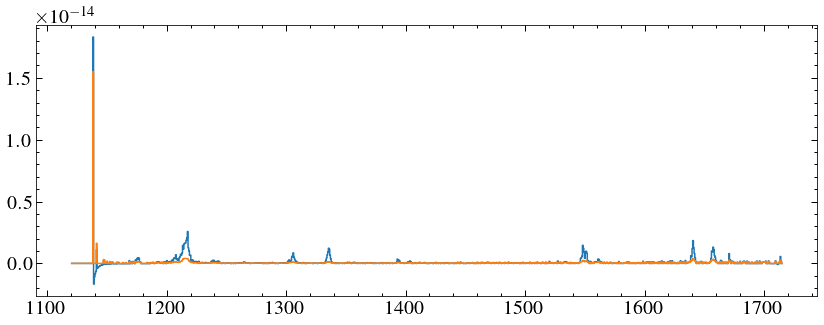

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609


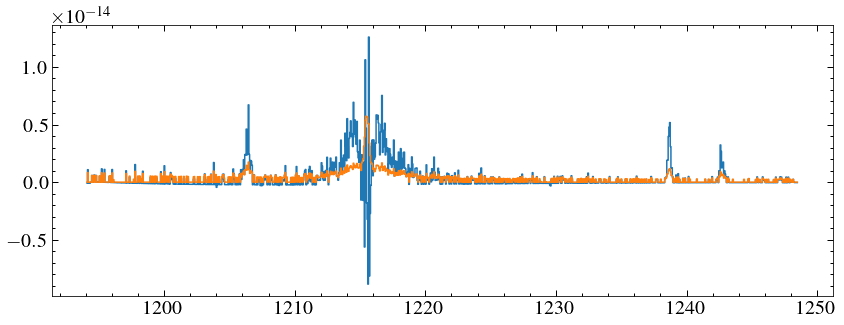

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396


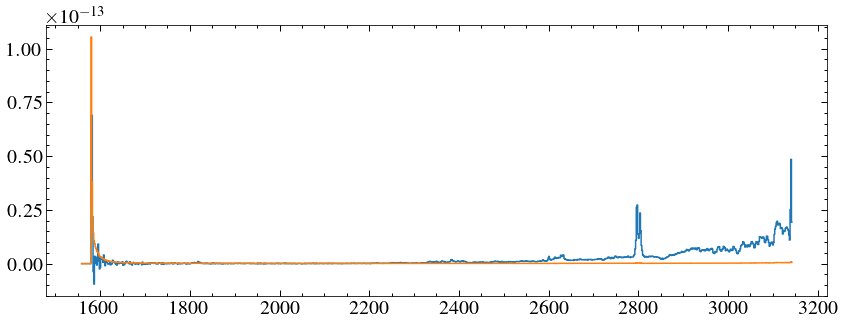

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9967


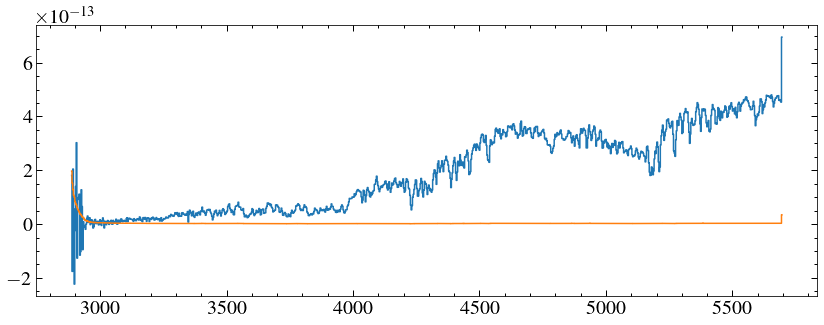

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # mask = w > 1600
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


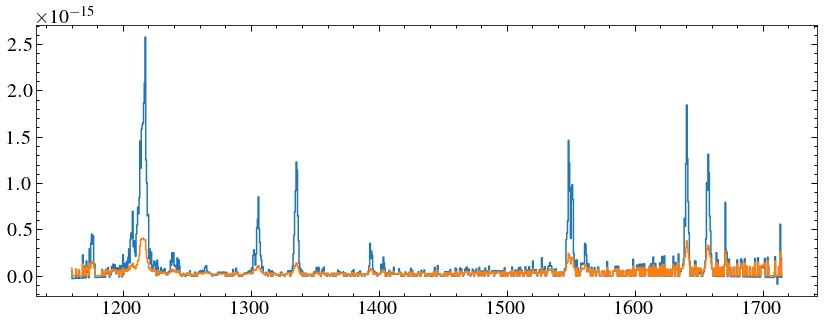

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609


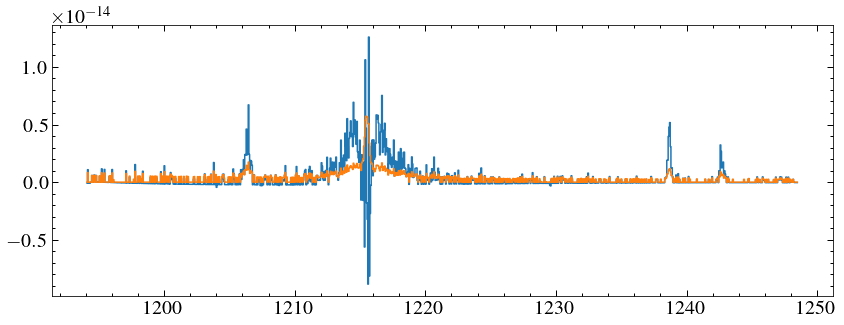

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396


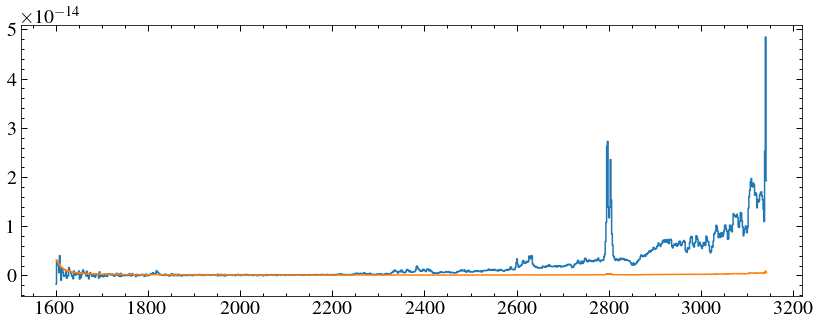

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9967


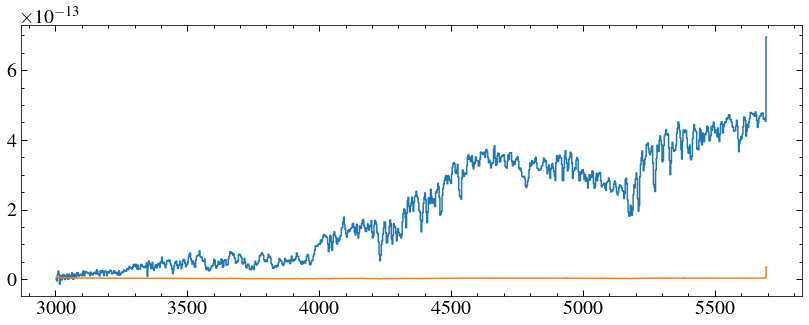

In [5]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140L', 'G140M']:
        mask = w > 1160
    elif grating == 'G230L':
        mask = w > 1600
    elif grating =='G430L':
        mask = w > 3000
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17040_sx1.fits
G430L
894.9967
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17030_x1d.fits
G230L
553.5396
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17020_x1d.fits
G140M
193.58609
/media/david/2tb_ext_hd/hddata/meats/hst/toi-836/oeoo17010_x1d.fits
G140L
64.04539


(1e-17, 1.6021207036736485e-12)

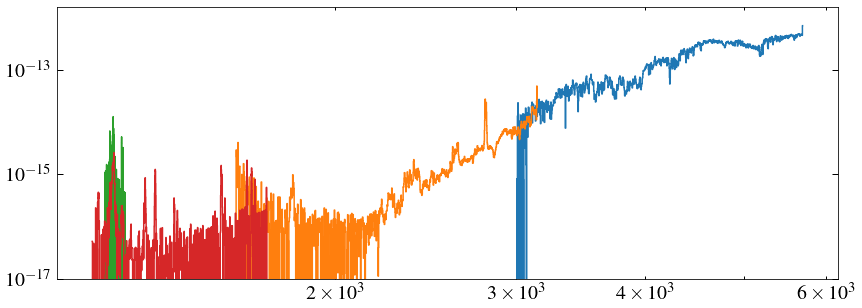

In [8]:
for x in x1ds[::-1]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140L', 'G140M']:
        mask = w > 1160
    elif grating == 'G230L':
        mask = w > 1600
    elif grating =='G430L':
        mask = w > 3000
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-17)
    

In [17]:
# fits.getheader(x1ds[2], 1)
print(fits.getdata(x1ds[2], 1)['EXTRSIZE'])
print(fits.getdata(x1ds[2], 1)['A2Center'])


[11.]
[553.5396]
